In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
df = pd.read_csv(r'E:\cms-downloader\cms_downloads\Spring 2023\Big Data and NoSQL\week 2023-5-25\egphotelbookings.csv')
df

Unnamed: 0              hotel  is_canceled  lead_time  \
0                0  Renaissance Hotel            0        342   
1                1  Renaissance Hotel            0        737   
2                2  Renaissance Hotel            0          7   
3                3  Renaissance Hotel            0         13   
4                4  Renaissance Hotel            0         14   
...            ...                ...          ...        ...   
119385      119385  JW Marriott Hotel            0         23   
119386      119386  JW Marriott Hotel            0        102   
119387      119387  JW Marriott Hotel            0         34   
119388      119388  JW Marriott Hotel            0        109   
119389      119389  JW Marriott Hotel            0        205   

        arrival_date_year arrival_date_month  arrival_date_week_number  \
0                    2018               July                        27   
1                    2018               July                        27   
2                    2018               July                        27   
3                    2018               July                        27   
4                    2018               July                        27   
...                   ...                ...                       ...   
119385               2017             August                        35   
119386               2017             August                        35   
119387               2017             August                        35   
119388               2017             August                        35   
119389               2017             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  ...  assigned_room_type  booking_changes  \
0                          0  ...                   C                3   
1                          0  ...                   C                4   
2                          1  ...                   C                0   
3                          1  ...                   A                0   
4                          2  ...                   A                0   
...                      ...  ...                 ...              ...   
119385                     5  ...                   A                0   
119386                     5  ...                   E                0   
119387                     5  ...                   D                0   
119388                     5  ...                   A                0   
119389                     7  ...                   A                0   

        deposit_type  agent company days_in_waiting_list  customer_type  \
0         No Deposit    NaN     NaN                    0      Transient   
1         No Deposit    NaN     NaN                    0      Transient   
2         No Deposit    NaN     NaN                    0      Transient   
3         No Deposit  304.0     NaN                    0      Transient   
4         No Deposit  240.0     NaN                    0      Transient   
...              ...    ...     ...                  ...            ...   
119385    No Deposit  394.0     NaN                    0      Transient   
119386    No Deposit    9.0     NaN                    0      Transient   
119387    No Deposit    9.0  

In [2]:
# check null values at each column
df.isna().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company has 112593 null values so we can't fill it, drop it.
we don't need babies column so drop this column.
Unnamed: 0 is just the id drop it.
arrival_date_week_number: we will not use arrival_date_week_number so drop it.

In [3]:
# drop company,babies and Unnamed column
df.drop(['company', 'babies', 'Unnamed: 0', 'arrival_date_week_number'], axis=1, inplace=True)


drop null values in the country and children. 

In [4]:
df.dropna(subset=['country', 'children'], inplace=True)

In [5]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                               0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


Add new column revenue which is the total revenue of this booking (adr * total days stayed).

In [6]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

get insights about the values inside each column

In [7]:
for col in df.columns:
    if(df[col].nunique() < 10):
        print(col)
        print(df[col].value_counts())
        print()

hotel
JW Marriott Hotel    79302
Renaissance Hotel    39596
Name: hotel, dtype: int64

is_canceled
0    74745
1    44153
Name: is_canceled, dtype: int64

arrival_date_year
2019    56435
2017    40604
2018    21859
Name: arrival_date_year, dtype: int64

children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

meal
BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

is_repeated_guest
0    115092
1      3806
Name: is_repeated_guest, dtype: int64

deposit_type
No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

customer_type
Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

required_

Detect the outliers and remove them using boxplots. : lead time, agent, days_in_waiting_list, adr


<AxesSubplot: >

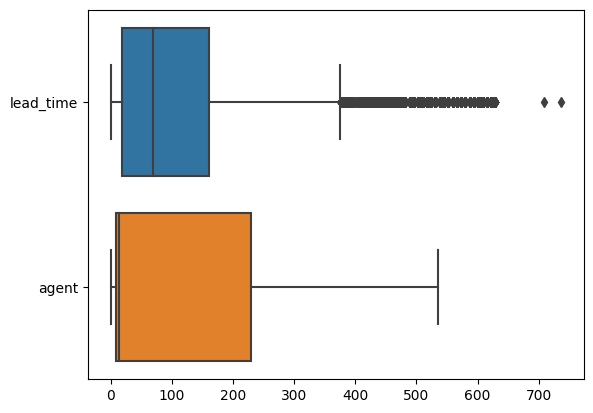

In [8]:
sb.boxplot(data=df[['lead_time','agent']], orient='h')

In [9]:
def remove_outliers(df, col_name):
    # remove outliers in lead_time
    Q1 = np.percentile(df[col_name], 25, method='midpoint')
    Q3 = np.percentile(df[col_name], 75, method='midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR

    #Below Lower bound
    lower=Q1-1.5*IQR
    df = df[((df[col_name]>=lower) & (df[col_name] <= upper))]
    return df

def boxplot(df, col_name):
    sb.boxplot( data = df[col_name], orient="h")

In [10]:
df = remove_outliers(df, 'lead_time')

In [11]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Renaissance Hotel            0        342               2018   
2       Renaissance Hotel            0          7               2018   
3       Renaissance Hotel            0         13               2018   
4       Renaissance Hotel            0         14               2018   
5       Renaissance Hotel            0         14               2018   
...                   ...          ...        ...                ...   
119385  JW Marriott Hotel            0         23               2017   
119386  JW Marriott Hotel            0        102               2017   
119387  JW Marriott Hotel            0         34               2017   
119388  JW Marriott Hotel            0        109               2017   
119389  JW Marriott Hotel            0        205               2017   

       arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
0                    July                          1                        0   
2                    July                          1                        0   
3                    July                          1                        0   
4                    July                          1                        0   
5                    July                          1                        0   
...                   ...                        ...                      ...   
119385             August                         30                        2   
119386             August                         31                        2   
119387             August                         31                        2   
119388             August                         31                        2   
119389             August                         29                        2   

        stays_in_week_nights  adults  children  ... assigned_room_type  \
0                          0       2       0.0  ...                  C   
2                          1       1       0.0  ...                  C   
3                          1       1       0.0  ...                  A   
4                          2       2       0.0  ...                  A   
5                          2       2       0.0  ...                  A   
...                      ...     ...       ...  ...                ...   
119385                     5       2       0.0  ...                  A   
119386                     5       3       0.0  ...                  E   
119387                     5       2       0.0  ...                  D   
119388                     5       2       0.0  ...                  A   
119389                     7       2       0.0  ...                  A   

       booking_changes deposit_type  agent  days_in_waiting_list  \
0                    3   No Deposit    NaN                     0   
2                    0   No Deposit    NaN                     0   
3                    0   No Deposit  304.0                     0   
4                    0   No Deposit  240.0                     0   
5                    0   No Deposit  240.0                     0   
...                ...          ...    ...                   ...   
119385               0   No Deposit  394.0                     0   
119386               0   No Deposit    9.0                     0   
119387               0   No Deposit    9.0                     0   
119388               0   No Deposit   89.0                     0   
119389               0   No Deposit    9.0                     0   

        customer_type     adr required_car_parking_spaces  \
0           Transient    0.00                           0   
2           Transient   75.00                           0   
3           Transient   75.00                           0   
4           Transient   98.00                           0   
5           Transient   98.00                           0   
...               ...     ...                         ...   
119385      Transient   96.14                    

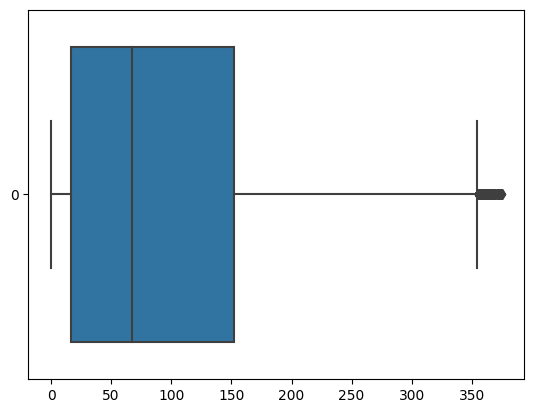

In [12]:
boxplot(df,'lead_time')

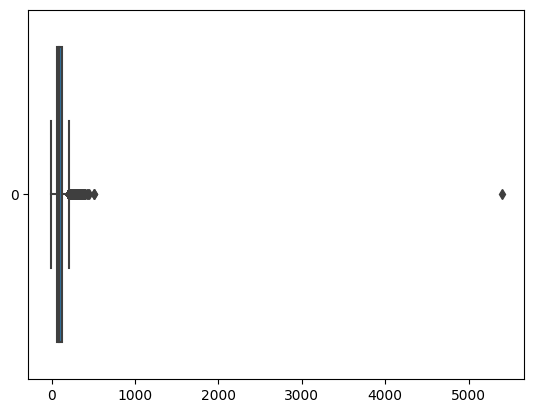

In [13]:
boxplot(df,'adr')

In [14]:
df = remove_outliers(df, 'adr')

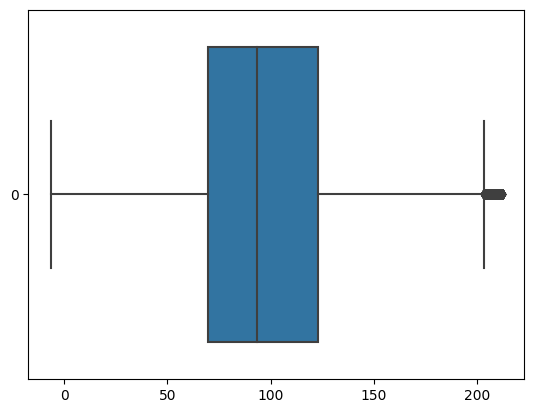

In [15]:
boxplot(df, 'adr')

C:\Users\saryn\AppData\Local\Temp\ipykernel_25080\912234535.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

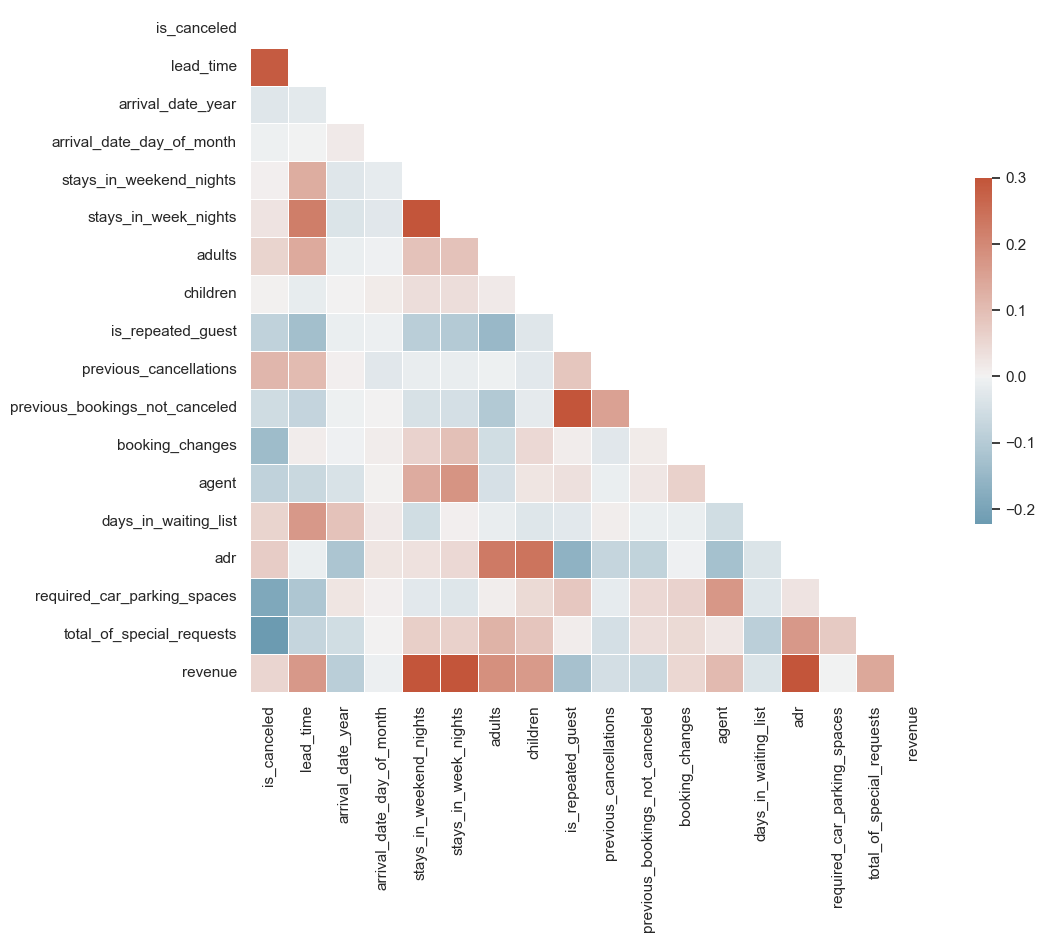

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

People who get children with them are more profitable to the hotel as there is a correlation between children and adr. (insight1)

Check the relation between the lead_time and is_cancelled.

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

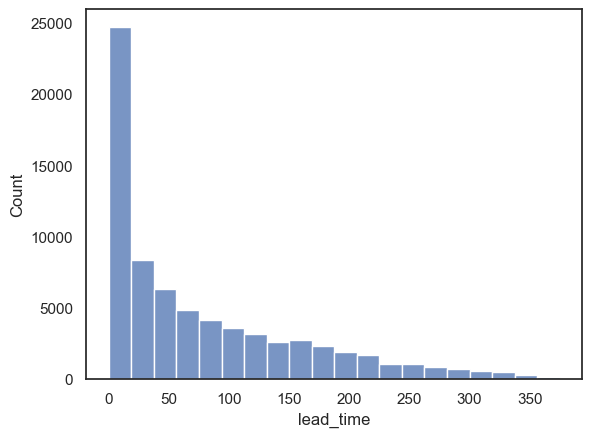

In [17]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='lead_time', bins=20)

We see from the histogram of the non-cancelled reservations: lead_time is shifted towards left or small number of days,
so : people don't tend to cancel when they reserved in date closer to the check in. (insight 2)

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

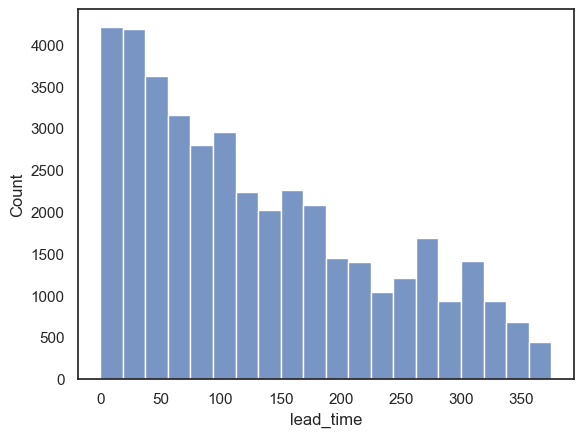

In [18]:
sns.histplot(data=df[(df['is_canceled'] == 1)], x='lead_time', bins=20)

If someone will cancel it's more likely he booked 100 days before the checkin. (insight 3)

Next, We want to see what are the months which are high in booking that are not cancelled.

<AxesSubplot: xlabel='Count', ylabel='arrival_date_month'>

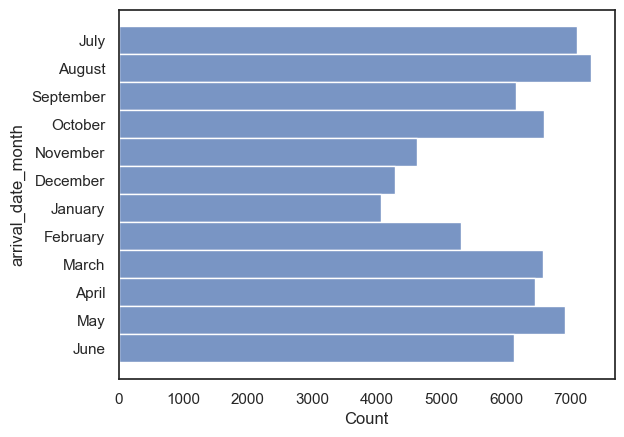

In [19]:
sb.histplot(data=df[(df['is_canceled']==0)], y='arrival_date_month')

May, July, August are the highest months that users book in. (insight 4)

Next what are the months which the user book in and cancel it.

<AxesSubplot: xlabel='Count', ylabel='arrival_date_month'>

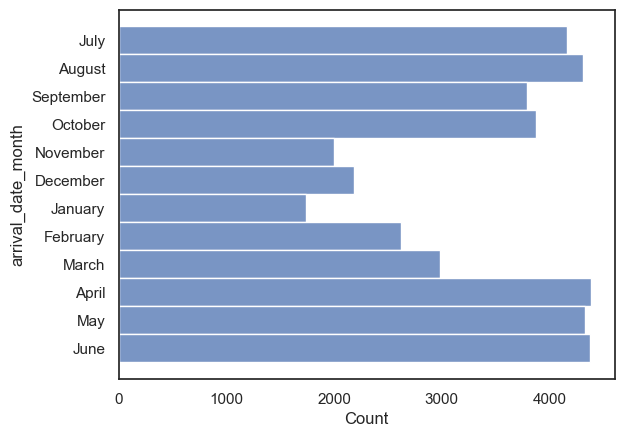

In [20]:
sb.histplot(data=df[(df['is_canceled']==1)], y='arrival_date_month')

April, May, June are the most months that the user book in and cancel. (insight 5)

Next see the relation between the deposit type and cancelation rate.

<AxesSubplot: xlabel='Count', ylabel='deposit_type'>

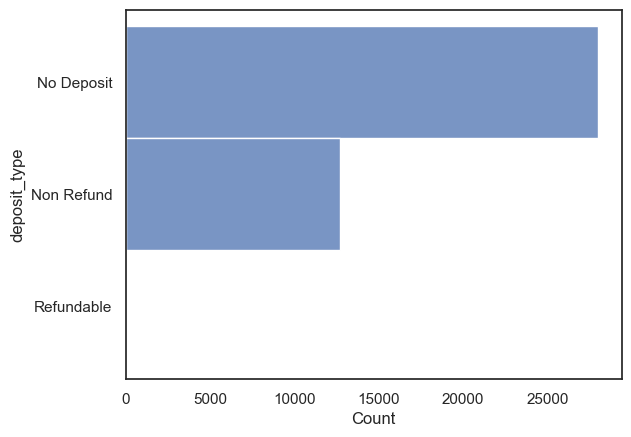

In [21]:
sb.histplot(data=df[(df['is_canceled']==1)], y='deposit_type')

We need to get the ratio between the number of people who choose No_deposit and cancelled bookings.

Also, need to get the ratio between the number of people who choose Non Refund and cancelled bookings.

In [22]:
nodeposit = len(df[(df['deposit_type'] == 'No Deposit')])
nonrefund = len(df[(df['deposit_type'] == 'Non Refund')])
nondepositeAndCancelled = len(df[(df['deposit_type'] == 'No Deposit') & (df['is_canceled']==1)])
nonreufndAndCancelled = len(df[(df['deposit_type'] == 'Non Refund') & (df['is_canceled']==1)])
print('No deposit users', nodeposit)
print('Non Refund users', nonrefund)
print('No deposit users & cancelled', nondepositeAndCancelled)
print('Non Refund users & cancelled', nonreufndAndCancelled)
print('ratio between No deposit users / No deposit users that cancelled = ', nondepositeAndCancelled/nodeposit)
print('ratio between Non Refund users / Non Refund users that cancelled = ', nonreufndAndCancelled/nonrefund)

No deposit users 99249
Non Refund users 12810
No deposit users & cancelled 27988
Non Refund users & cancelled 12718
ratio between No deposit users / No deposit users that cancelled =  0.2819978035043174
ratio between Non Refund users / Non Refund users that cancelled =  0.9928181108508978


There is a strange pattern that users that use deposit type as non refund tends to cancel more than users that don't add deposit.
The histogram and the ratio strengthen the pattern. (insight 6)

See which customers are more loyal to their hotel, and the next time any customer has this rule will be given a promotion.

In [23]:
loyal_customers = df[(df['previous_bookings_not_canceled'] > 3) & (df['previous_cancellations'] == 0)]
print('number of loyal customers till now', len(loyal_customers))

number of loyal customers till now 637


In [24]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [25]:
sc = SparkContext()
spark = SparkSession.builder.appName("Python Spark DataFrames basic example").config("spark.some.config.option", "some-value").getOrCreate()


In [26]:
sdf = spark.createDataFrame(df) 
sdf.createOrReplaceTempView("hotels_booking")
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- days_in_waiting_list: long (nu

In [27]:
# get the most repeated agencies with non cancelled bookings
command = '''
SELECT agent,COUNT(agent) as numberOfBookings
FROM hotels_booking
WHERE IsNan(agent) = 0
and is_canceled = 0
GROUP BY agent
ORDER BY numberOfBookings DESC
LIMIT 5'''
spark.sql(command).show()

+-----+----------------+
|agent|numberOfBookings|
+-----+----------------+
|  9.0|           18289|
|240.0|            7651|
|  7.0|            3007|
| 14.0|            2825|
|250.0|            2022|
+-----+----------------+



We have 3 agencies(9, 240, 7) that we can offer their users some promotions, as these agencies bring us huge number of visitors. (Promotion #1)

Let's get the users that have large difference between the not canceled bookings and canceled bookings.
Any further booking that contains these criteria we will give them promotions. as they are serious customers. (promotion #2)

In [28]:
command = '''
SELECT *,(previous_bookings_not_canceled-previous_cancellations) as loyality FROM hotels_booking
WHERE (previous_bookings_not_canceled-previous_cancellations) > 1
ORDER BY loyality
'''
spark.sql(command).show()

+-----------------+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+---------------+-----+---------------------------+-------------------------+-------+--------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|  customer_type|  adr|required_car_parking_spaces|total_of_special_requests|revenue|loyality|
+-----------------+-----------+---------+-----------------+------------------+----

Get the relation between number of stays in weekend and the adr

In [29]:
command = '''
SELECT AVG(adr),stays_in_weekend_nights FROM hotels_booking
GROUP BY stays_in_weekend_nights
ORDER BY AVG(adr) DESC
'''
spark.sql(command).show()

+------------------+-----------------------+
|          avg(adr)|stays_in_weekend_nights|
+------------------+-----------------------+
|102.97136640557002|                      3|
|100.33978077463851|                      2|
| 99.32376077438737|                      1|
| 95.35296342168262|                      0|
| 94.87544937428895|                      4|
| 88.64423076923079|                      5|
| 75.50893333333332|                      6|
| 70.05135593220338|                      8|
| 65.71818181818182|                      9|
| 61.05428571428571|                     10|
| 59.48736842105263|                      7|
|            25.786|                     12|
|20.876666666666665|                     16|
|14.036666666666667|                     13|
|               0.0|                     14|
+------------------+-----------------------+



Staying in the weekend 2 or 3 days are the most profitable to the hotel. (insight 7)

Let's discover the average adr according to the room type and what the type of rooms are more profitable

In [30]:
import plotly.express as pltx
pltx.box(data_frame = df[(df['is_canceled'] == 0)], x = 'reserved_room_type', y = 'adr', color = 'hotel')

Room of type H,L in Renaissance and H,F in JW Marriott are the highest in ADR. (insight 8)

Get the room types that are poorly booked.

<AxesSubplot: xlabel='reserved_room_type', ylabel='Count'>

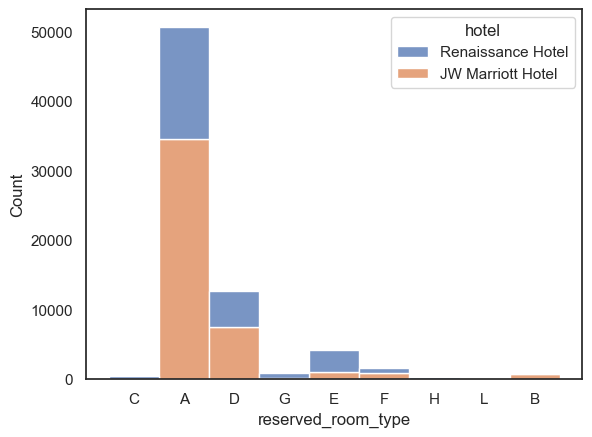

In [31]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='reserved_room_type', hue='hotel', multiple='stack')

In [32]:
command = '''
SELECT reserved_room_type, COUNT(reserved_room_type) as numberOfBookings
FROM hotels_booking
WHERE is_canceled = 0
GROUP BY reserved_room_type
ORDER BY numberOfBookings DESC
'''
spark.sql(command).show()


+------------------+----------------+
|reserved_room_type|numberOfBookings|
+------------------+----------------+
|                 A|           50667|
|                 D|           12636|
|                 E|            4219|
|                 F|            1591|
|                 G|             893|
|                 B|             744|
|                 C|             475|
|                 H|             248|
|                 L|               4|
+------------------+----------------+



We will do promotions on the room types (G,B,H,C,L) as they are the least booked. (promotion #3)

Get the average room price in each month for each hotel.

<AxesSubplot: xlabel='arrival_date_month'>

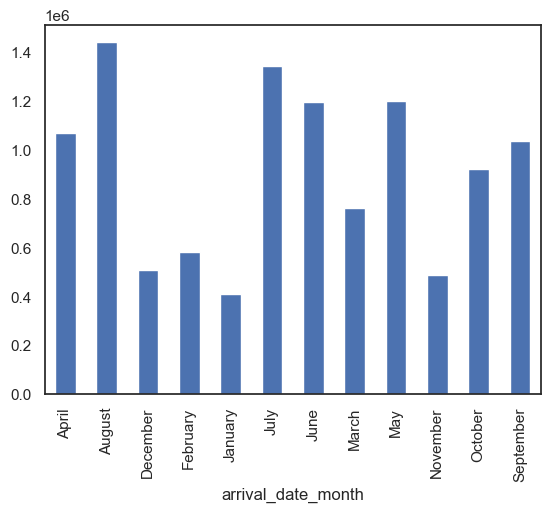

In [33]:
df.groupby('arrival_date_month')['adr'].sum().plot(kind='bar')

In [34]:
command = '''
SELECT arrival_date_month,
cast(AVG(adr) as numeric(36,2)) as `average adr in month`
FROM hotels_booking
GROUP BY arrival_date_month
ORDER BY AVG(adr) DESC
'''
spark.sql(command).show()

+------------------+--------------------+
|arrival_date_month|average adr in month|
+------------------+--------------------+
|            August|              124.01|
|              July|              119.32|
|              June|              114.12|
|               May|              107.00|
|         September|              104.51|
|             April|               98.82|
|           October|               88.23|
|             March|               80.01|
|          December|               78.76|
|          November|               74.00|
|          February|               73.50|
|           January|               70.62|
+------------------+--------------------+



August, July, June (summer months) are the highest in room prices. give promotion in these months to increase number of bookings. (promotion#4)

Visualize the total revenue in each month.

<AxesSubplot: xlabel='arrival_date_month'>

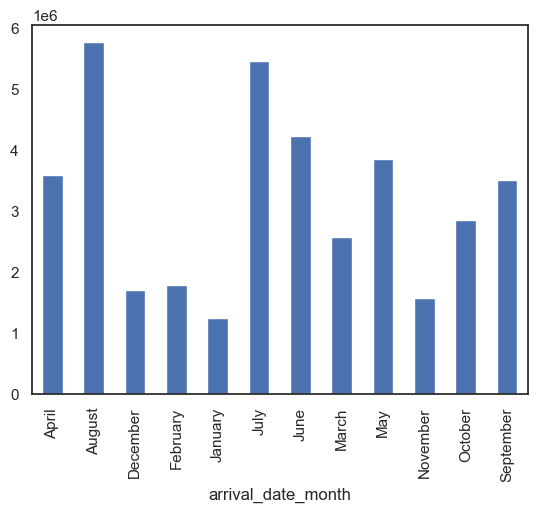

In [35]:
df.groupby('arrival_date_month')['revenue'].sum().plot(kind='bar')

In [36]:
command = '''
SELECT arrival_date_month,
cast(SUM(revenue) as numeric(36,2)) as total_revenue
FROM hotels_booking
GROUP BY arrival_date_month
ORDER BY total_revenue DESC
'''

spark.sql(command).show()

+------------------+-------------+
|arrival_date_month|total_revenue|
+------------------+-------------+
|            August|   5762979.20|
|              July|   5459542.45|
|              June|   4237506.51|
|               May|   3861586.17|
|             April|   3587618.59|
|         September|   3517364.52|
|           October|   2859488.43|
|             March|   2573893.03|
|          February|   1791505.29|
|          December|   1704144.09|
|          November|   1574526.55|
|           January|   1256240.03|
+------------------+-------------+



The most profitable months are August, July, June.(insight 11)

Now let's do some predictions on which bookings will be canceled.

In [37]:
# remove some useless columns to the cancelation to get better results with the predictions (features selection)
sdf_cleaned = sdf.drop('arrival_date_year','arrival_date_day_of_month', 'children', 'meal', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces')

In [38]:
# get numerical , categorical columns of the dataframe
numerical_columns = []
categorical_columns = []
for col in sdf_cleaned.dtypes:
    if col[1] == 'string':
        categorical_columns.append(col[0])
    else:
        numerical_columns.append(col[0])

Do some preprocessing to be able to fit the model to the data.

In [39]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import StringIndexer, VectorAssembler

# encode the categorical columns to numerical values using StringIndexer
stages = []
for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    stages += [stringIndexer]

# apply the stages to the dataframe
featurizationPipeline = Pipeline(stages = stages)
featurizationPipelineModel = featurizationPipeline.fit(sdf)
sdf = featurizationPipelineModel.transform(sdf)

# add the independant variables to the stages except the target variable 'is_canceled'
assemblerInputs = []
for categoricalCol in categorical_columns:
    if categoricalCol != 'is_canceled':
        assemblerInputs.append(categoricalCol + "Index")

# add the numerical columns to the stages
stages_split = []
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="feature_vector")
stages_split += [assembler]
featurizationPipeline = Pipeline(stages = stages_split)
featurizationPipelineModel = featurizationPipeline.fit(sdf)
sdf = featurizationPipelineModel.transform(sdf)

In [40]:
# add column named 'label' is the same as 'is_canceled' column as the crossvalidator needs it
sdf = sdf.withColumn("label", sdf["is_canceled"])

In [41]:
sdf.toPandas().head()

hotel  is_canceled  lead_time  arrival_date_year  \
0  Renaissance Hotel            0        342               2018   
1  Renaissance Hotel            0          7               2018   
2  Renaissance Hotel            0         13               2018   
3  Renaissance Hotel            0         14               2018   
4  Renaissance Hotel            0         14               2018   

  arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
0               July                          1                        0   
1               July                          1                        0   
2               July                          1                        0   
3               July                          1                        0   
4               July                          1                        0   

   stays_in_week_nights  adults  children  ... hotelIndex  \
0                     0       2       0.0  ...        1.0   
1                     1       1       0.0  ...        1.0   
2                     1       1       0.0  ...        1.0   
3                     2       2       0.0  ...        1.0   
4                     2       2       0.0  ...        1.0   

  arrival_date_monthIndex countryIndex  distribution_channelIndex  \
0                     1.0          0.0                        1.0   
1                     1.0          1.0                        1.0   
2                     1.0          1.0                        2.0   
3                     1.0          1.0                        0.0   
4                     1.0          1.0                        0.0   

   reserved_room_typeIndex  assigned_room_typeIndex deposit_typeIndex  \
0                      6.0                      5.0               0.0   
1                      0.0                      5.0               0.0   
2                      0.0                      0.0               0.0   
3                      0.0                      0.0               0.0   
4                      0.0                      0.0               0.0   

  customer_typeIndex                            feature_vector label  
0                0.0  [1.0, 1.0, 0.0, 1.0, 6.0, 5.0, 0.0, 0.0]     0  
1                0.0  [1.0, 1.0, 1.0, 1.0, 0.0, 5.0, 0.0, 0.0]     0  
2                0.0  (1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0)     0  
3                0.0  (1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)     0  
4                0.0  (1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)     0  

[5 rows x 37 columns]

In [42]:
# split the data to train and test
train, test = sdf.randomSplit([0.8, 0.2], seed = 12345)

[1st Model] will be logistic regression that predicts whether the booking will be canceled or not

In [43]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=25)
lrModel = lr.fit(train)

predictions = lrModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.86598950985551...|
|          0|       0.0|[0.95011790393389...|
|          0|       0.0|[0.89508276214334...|
|          0|       0.0|[0.90906471722984...|
|          0|       0.0|[0.66378912103123...|
|          0|       0.0|[0.95968034268683...|
|          0|       0.0|[0.76166183791674...|
|          0|       0.0|[0.64667528330246...|
|          0|       0.0|[0.93115148993830...|
|          0|       0.0|[0.81371395208644...|
+-----------+----------+--------------------+
only showing top 10 rows



In [44]:
# get the accuracy of the model using accuracy_score on the test data
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  75.03990776871231 %


Let's tune the hyperparameters of the model using the crossValidator which automate the tuning by trying the given parameters and choose the best one based on the evaluator.

In [45]:
# tune the model using the training data
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
                .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
                .addGrid(lr.maxIter, [10, 20, 40])
                .build())

evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
cvModel.bestModel

LogisticRegressionModel: uid=LogisticRegression_c7ea2c4f39a2, numClasses=2, numFeatures=8

In [46]:
predictions = cvModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)

accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.86598950985551...|
|          0|       0.0|[0.95011790393389...|
|          0|       0.0|[0.89508276214334...|
|          0|       0.0|[0.90906471722984...|
|          0|       0.0|[0.66378912103123...|
|          0|       0.0|[0.95968034268683...|
|          0|       0.0|[0.76166183791674...|
|          0|       0.0|[0.64667528330246...|
|          0|       0.0|[0.93115148993830...|
|          0|       0.0|[0.81371395208644...|
+-----------+----------+--------------------+
only showing top 10 rows

accuracy of the model =  75.03990776871231 %


75% accuracy score for the logistic regression.

[2nd Model] will be Decision Tree classifier 

In [47]:
# train KNN model on the data
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxBins=180)
dtModel = dt.fit(train)

predictions = dtModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)


+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.76837021525458...|
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.79010137149672...|
|          0|       0.0|[0.76837021525458...|
|          0|       0.0|[0.64517169111720...|
|          0|       0.0|[0.79010137149672...|
+-----------+----------+--------------------+
only showing top 10 rows



In [48]:
# get the accuracy of the model using accuracy_score on the test data
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  76.04647037956722 %


76% accuracy for the Decision tree.

[3rd Model] Try the random forest classifier.

In [49]:
# train random forest model on the data
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxBins=180)
rfModel = rf.fit(train)

predictions = rfModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)


+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.74516970690523...|
|          0|       0.0|[0.82948748836153...|
|          0|       0.0|[0.73586581707550...|
|          0|       0.0|[0.81544454336451...|
|          0|       0.0|[0.73240936483948...|
|          0|       0.0|[0.81873052908361...|
|          0|       0.0|[0.74845569262433...|
|          0|       0.0|[0.73495659999264...|
|          0|       0.0|[0.73542464723371...|
|          0|       0.0|[0.73915180279460...|
+-----------+----------+--------------------+
only showing top 10 rows



In [50]:
# get the accuracy of the model using accuracy_score on the test data
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  75.3503015253636 %


Also 76% accuracy for the Random Forest Model.

[4th Model] Try to train Support Vector Machines to classify, SVM are the best in binary classifications.

In [51]:
# Support Vector Machine
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=10)
svmModel = svm.fit(train)

predictions = svmModel.transform(test)
predictions.select('is_canceled', 'prediction').show(10)

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 10 rows



In [52]:
# accuracy of the model
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  75.27048598793898 %


75% accuracy SVM

[5th Model] Try Gradient Boost

In [53]:
# Gradient Boosting
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=10, maxBins=180)
gbtModel = gbt.fit(train)

predictions = gbtModel.transform(test)
predictions.select('is_canceled', 'prediction').show(10)

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 10 rows



In [54]:
# accuracy of the model
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')


accuracy of the model =  76.70716566158212 %


Gradient Boost 76% accuracy